<a href="https://colab.research.google.com/github/Joocheol/Financial-Engineering/blob/master/Deep_hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
layers.Input(shape=(1,))

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_63')>

In [ ]:
hedge = layers.Input(shape=(1,), name='hedge')
inputs = [hedge]

for j in range(3):
    price = layers.Input(shape=(1,), name='price_'+str(j))
    hedge = layers.Add(name="do_sth_"+str(j))([price, hedge])
    inputs = inputs + [price]
    
#hedge = layers.Add()([hedge, price])
    

model = keras.Model(inputs=inputs, outputs=[hedge])

In [ ]:
inputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'hedge')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'price_0')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'price_1')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'price_2')>]

In [ ]:
model.summary()

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 price_0 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 hedge (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 price_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 do_sth_0 (Add)                 (None, 1)            0           ['price_0[0][0]',                
                                                                  'hedge[0][0]']           

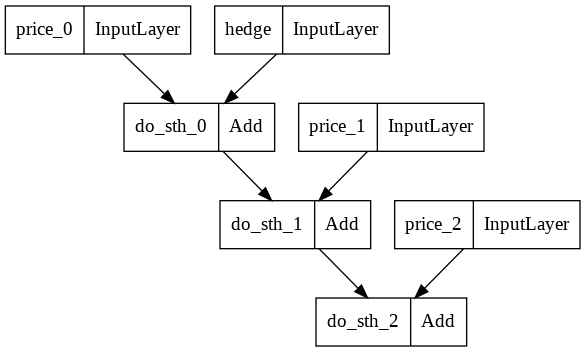

In [ ]:
tf.keras.utils.plot_model(model)

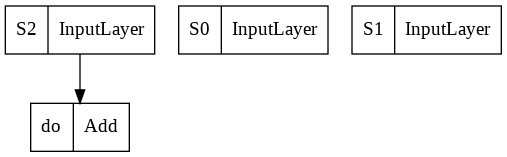

In [ ]:
my_input = []

for j in range(3):
    price = tf.keras.layers.Input(shape=(1,), name='S'+str(j))
    my_input = my_input + [price]

my_output = tf.keras.layers.Add(name='do')([price, price])

model = tf.keras.Model(inputs=my_input, outputs=my_output)

tf.keras.utils.plot_model(model)

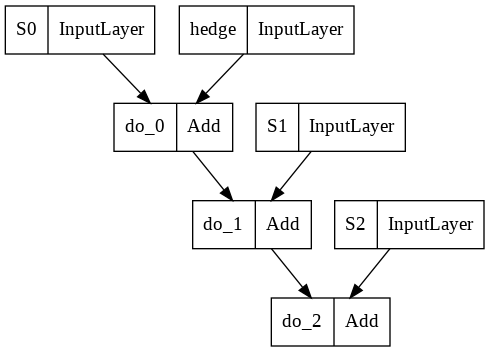

In [ ]:
my_input = []

hedge = tf.keras.layers.Input(shape=(1,), name='hedge')
my_input = my_input + [hedge]

for j in range(3):
    price = tf.keras.layers.Input(shape=(1,), name='S'+str(j))
    my_input = my_input + [price]

    hedge = tf.keras.layers.Add(name='do_'+str(j))([price, hedge])

model = tf.keras.Model(inputs=my_input, outputs=hedge)

tf.keras.utils.plot_model(model)

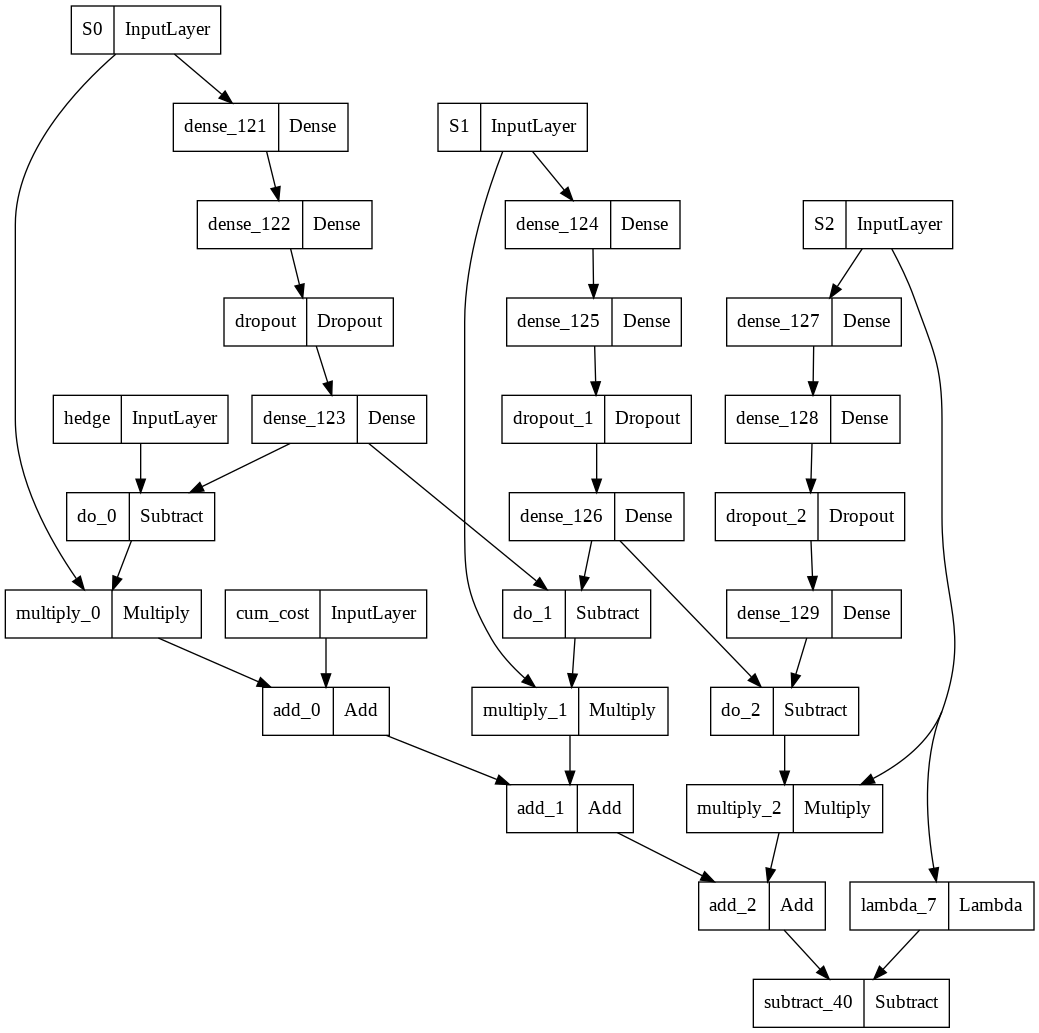

In [ ]:
my_input = []

hedge = tf.keras.layers.Input(shape=(1,), name='hedge')
my_input = my_input + [hedge]

cum_cost = tf.keras.layers.Input(shape=(1,), name="cum_cost")
my_input = my_input + [cum_cost]

for j in range(3):
    price = tf.keras.layers.Input(shape=(1,), name='S'+str(j))
    my_input = my_input + [price]

    delta = tf.keras.layers.Dense(128, activation='relu')(price)
    delta = tf.keras.layers.Dense(128, activation='relu')(delta)
    delta = tf.keras.layers.Dropout(0.5)(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    hedge = tf.keras.layers.Subtract(name='do_'+str(j))([hedge, delta])
    cost = tf.keras.layers.Multiply(name="multiply_"+str(j))([hedge, price])
    cum_cost = tf.keras.layers.Add(name="add_"+str(j))([cum_cost, cost])
    hedge = delta

payoff = tf.keras.layers.Lambda(lambda x : 0.5*(tf.abs(x-100)+x-100))(price)
cum_cost = tf.keras.layers.Subtract()([cum_cost, payoff])





model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

tf.keras.utils.plot_model(model)

In [ ]:
r = 0.00
sig = 0.2
T = 30/365

M = 100
N = 300

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt) 

S0 = 100

M = 10
N = 2

S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

for i in range(M):
    S[i,0] = S0
    for j in range(N):
        S[i,j+1] = S[i,j] * (1+rv[i,j])

S

array([[100.        ,  99.84191871, 100.02994287],
       [100.        ,  99.89003192, 100.29066847],
       [100.        ,  99.71836002,  99.854032  ],
       [100.        , 100.19304639, 100.05243394],
       [100.        ,  99.69536496,  99.76279925],
       [100.        ,  99.22147309,  99.06880977],
       [100.        ,  99.92592578, 100.39971031],
       [100.        ,  99.79258123,  99.92847607],
       [100.        , 100.4715418 , 100.70001209],
       [100.        , 100.21940448,  99.60880046]])

In [ ]:
h = np.zeros([10,1])
c = np.zeros([10,1])
S = [S[:,i] for i in range(3)]
x = [h]+[c]+[S]
y = np.zeros([10,1])

In [ ]:
S

[array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([ 99.84191871,  99.89003192,  99.71836002, 100.19304639,
         99.69536496,  99.22147309,  99.92592578,  99.79258123,
        100.4715418 , 100.21940448]),
 array([100.02994287, 100.29066847,  99.854032  , 100.05243394,
         99.76279925,  99.06880977, 100.39971031,  99.92847607,
        100.70001209,  99.60880046])]

In [ ]:
model.compile(loss='mse')

In [ ]:
model.fit(x,y, epochs=1000,  verbose=False)

In [ ]:
model.predict(x)

array([[ 0.0939827 ],
       [-0.05440521],
       [ 0.04911423],
       [ 0.07747269],
       [ 0.00986862],
       [-0.28543854],
       [-0.11663818],
       [ 0.0805397 ],
       [-0.2927971 ],
       [-0.06238937]], dtype=float32)